# California Housing Prices Prediction 

This project aims to buuld a Machine Learning Model that can predict california housing prices with a acceptable accuracy. 

### 1. Importing Libraries and Data Set

In [5]:
# Importing Required Libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix


In [6]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

### 2. Data Preprocessing

In [89]:
# Get dataset infromation to study categorical values and look for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [90]:
# Check for null values again.
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

### 3. Visualisations 

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Target'}>]], dtype=object)

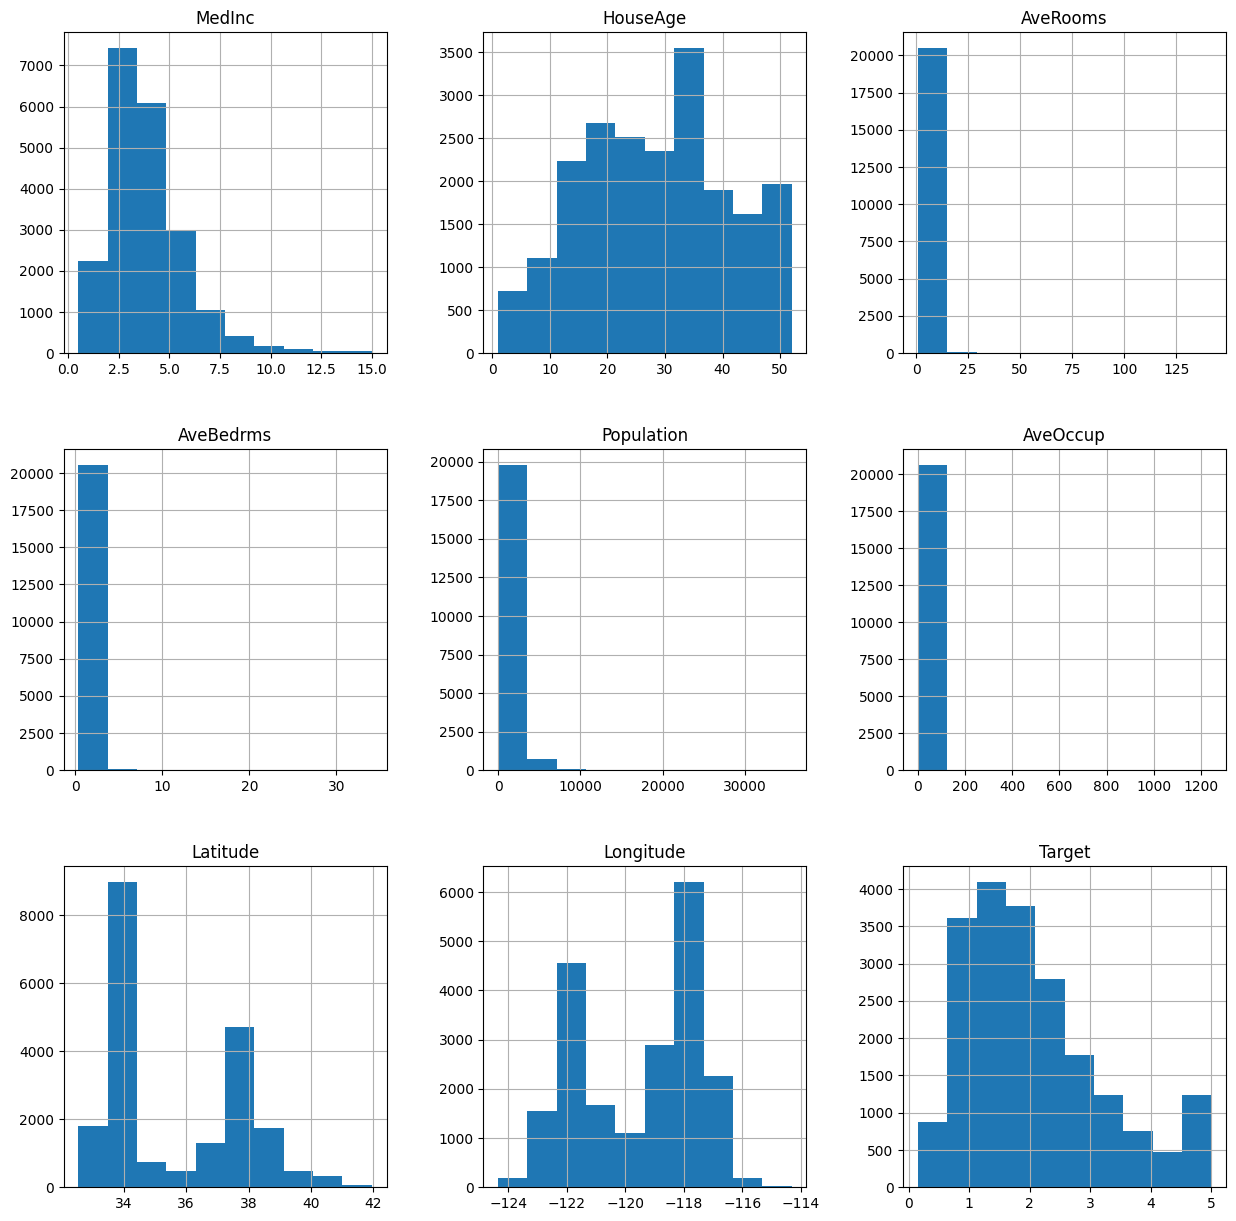

In [91]:
# See Column wise histogram 
df.hist(figsize=(15, 15))

<Axes: >

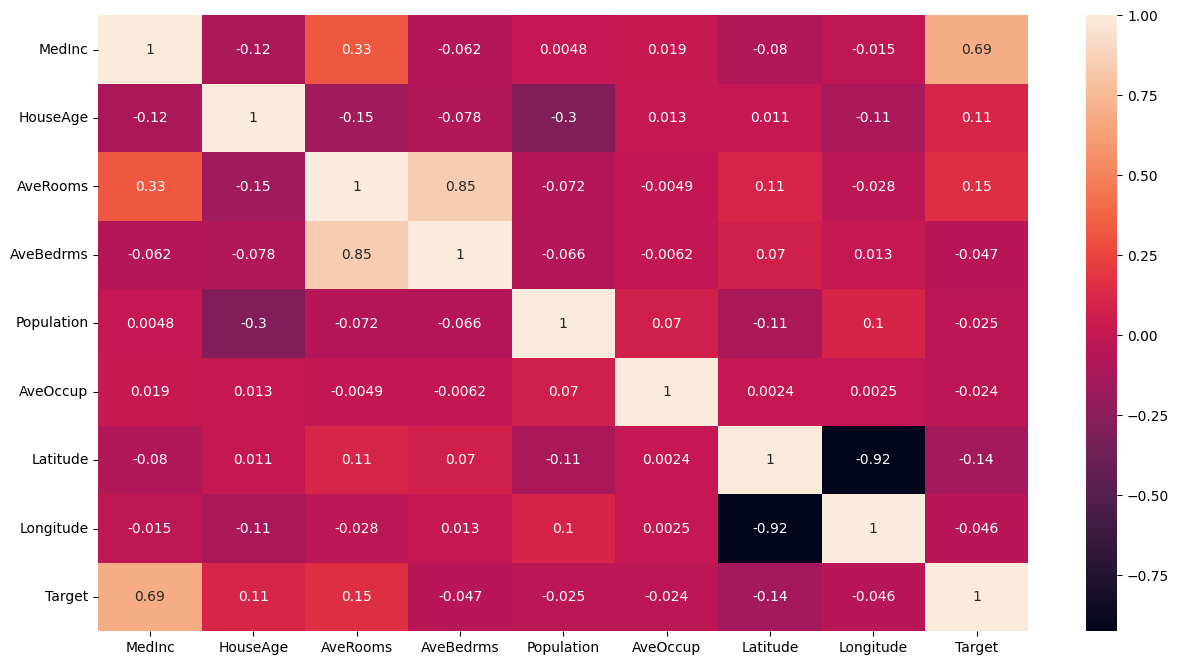

In [92]:
# Plot a correlation heat plot to see usefull features
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True)

### 4. Model Building

In [97]:
# Data Split
X = df.drop(['Target'],axis=1)
y = df['Target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42")

#### 4.1 Linear Regression

In [98]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred_lin = lin_reg.predict(X_test)

rmse   = np.sqrt(mean_squared_error(y_test,y_pred_lin))
print('Training Score: ', lin_reg.score(X_train, y_train))
print('Testing Score: ', lin_reg.score(X_test, y_test))
print('RMSE: ',rmse)

Training Score:  0.6125511913966952
Testing Score:  0.5757877060324511
RMSE:  0.7455813830127761


#### 4.2 Decision Tree


In [99]:
dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X_train,y_train)
y_pred_dtree = dtree_reg.predict(X_test)

rmse   = np.sqrt(mean_squared_error(y_test,y_pred_dtree))
print('Training Score: ', dtree_reg.score(X_train, y_train))
print('Testing Score: ', dtree_reg.score(X_test, y_test))
print('RMSE: ',rmse)


Training Score:  1.0
Testing Score:  0.6194994339564517
RMSE:  0.70612418027512


#### 4.3 Random Forest Regressor

In [102]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred_rfr = rf_reg.predict(X_test)

rmse   = np.sqrt(mean_squared_error(y_test,y_pred_rfr))
print('Training Score: ', rf_reg.score(X_train, y_train))
print('Testing Score: ', rf_reg.score(X_test, y_test))
print('RMSE: ',rmse)

Training Score:  0.9733846865887744
Testing Score:  0.8076290920570812
RMSE:  0.5020802375325626


#### 4.4 Gradient Boosting Regressor

In [105]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
y_pred_gbr = gb_reg.predict(X_test)

rmse   = np.sqrt(mean_squared_error(y_test,y_pred_gbr))
print('Training Score: ', gb_reg.score(X_train, y_train))
print('Testing Score: ', gb_reg.score(X_test, y_test))
print('RMSE: ',rmse)

Training Score:  0.8048978817773166
Testing Score:  0.7755824521517652
RMSE:  0.5422903000931637


### 5. Model Accuracy Visualisation

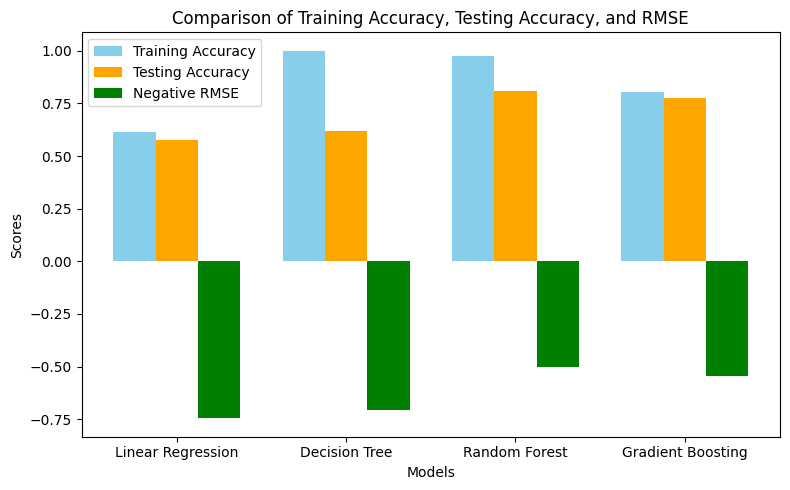

In [109]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
training_accuracy = [lin_reg.score(X_train, y_train),
                     dtree_reg.score(X_train, y_train),
                     rf_reg.score(X_train, y_train),
                     gb_reg.score(X_train, y_train) 
                     ]  
testing_accuracy =  [lin_reg.score(X_test, y_test),
                     dtree_reg.score(X_test, y_test),
                     rf_reg.score(X_test, y_test),
                     gb_reg.score(X_test, y_test) 
                     ]  
rmse_scores = [np.sqrt(mean_squared_error(y_test, y_pred_lin)),
               np.sqrt(mean_squared_error(y_test, y_pred_dtree)),
               np.sqrt(mean_squared_error(y_test, y_pred_rfr)),
               np.sqrt(mean_squared_error(y_test, y_pred_gbr)),
               ]          
# Convert RMSE scores to negative for visualization (lower is better)
neg_rmse_scores = [-x for x in rmse_scores]

# Define bar width
bar_width = 0.25
x = np.arange(len(models))  # X-axis positions

# Plot bars
plt.figure(figsize=(8, 5))
plt.bar(x - bar_width, training_accuracy, width=bar_width, label='Training Accuracy', color='skyblue')
plt.bar(x, testing_accuracy, width=bar_width, label='Testing Accuracy', color='orange')
plt.bar(x + bar_width, neg_rmse_scores, width=bar_width, label='Negative RMSE', color='green')

# Add labels and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Training Accuracy, Testing Accuracy, and RMSE')
plt.xticks(x, models)  # Add model names to x-axis
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
